In [1]:
library(tidyverse)
library(tidyr)
library(ggplot2)
library(lubridate)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This is an analysis of the movies and TV Shows on the streaming platform "Netflix". In this analysis I will try to answer the following questions;

1. Understanding what content is available in different countries.
2. What year had the most Movies and TV show releases in Netflix.
3. Network analysis of Actors / Directors and find interesting insights.
4. Does Netflix have more focus on TV Shows than movies in recent years.
5. Has Duration of movies over the years increased or decreased.
6. Compare ratings of TV Shows and Movies and determine how they are rated.

In [2]:
#here, we are importing and viewingthe dataset to be used for this analysis
netflix_movies <- read.csv("../input/netflix-shows/netflix_titles.csv")

head(netflix_movies)
glimpse(netflix_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
2,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
4,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
5,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


Rows: 8,807
Columns: 12
$ show_id      <chr> "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s1…
$ type         <chr> "Movie", "TV Show", "TV Show", "TV Show", "TV Show", "TV …
$ title        <chr> "Dick Johnson Is Dead", "Blood & Water", "Ganglands", "Ja…
$ director     <chr> "Kirsten Johnson", "", "Julien Leclercq", "", "", "Mike F…
$ cast         <chr> "", "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Mola…
$ country      <chr> "United States", "South Africa", "", "", "India", "", "",…
$ date_added   <chr> "September 25, 2021", "September 24, 2021", "September 24…
$ release_year <int> 2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 202…
$ rating       <chr> "PG-13", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "PG…
$ duration     <chr> "90 min", "2 Seasons", "1 Season", "1 Season", "2 Seasons…
$ listed_in    <chr> "Documentaries", "International TV Shows, TV Dramas, TV M…
$ description  <chr> "As her father nears the end of his life, filmmaker Kirst…


In [3]:
#here,we want to view a summary of the dataset before we start cleaning
summary(netflix_movies)

   show_id              type              title             director        
 Length:8807        Length:8807        Length:8807        Length:8807       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     cast             country           date_added         release_year 
 Length:8807        Length:8807        Length:8807        Min.   :1925  
 Class :character   Class :character   Class :character   1st Qu.:2013  
 Mode  :character   Mode  :character   Mode  :character   Median :2017  
                                                          Mean   :2014  
                                                          3rd Qu.:2019  
                       

In [4]:
#from the summary above we discovered the date column is not formatted correctly

netflix_movies <- netflix_movies %>%
mutate(date_added = mdy(date_added))

#date_added column has been formatted to date

**EXPLORATIONS**

Let us determine whether Netflix has been more focused on TV shows or movies.

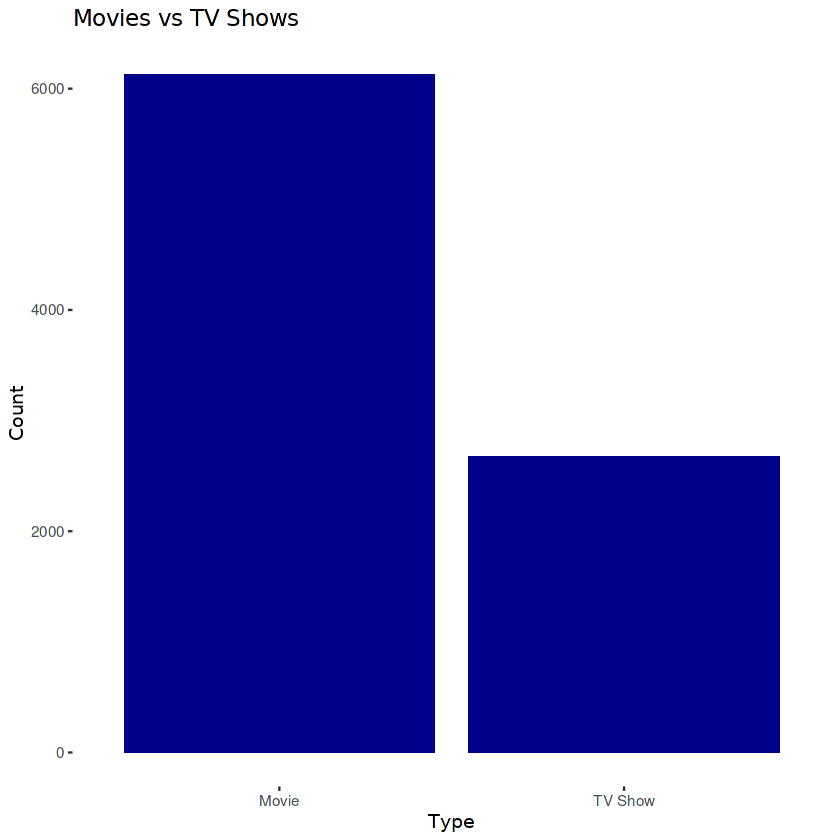

In [5]:
ggplot(data=netflix_movies, aes(x=type))+geom_bar(fill = "dark blue")+ 
labs(title ='Movies vs TV Shows') +
xlab("Type")+
ylab("Count")+
theme(plot.title = element_text(40),axis.title.x = element_text(30)
      ,axis.title.y = element_text(30),panel.background = element_blank())


***Netflix is clearly more focused on MOVIES.***

**We will then create visualizations for the top nations that Netflix targets with its movies and TV shows.**

*First, we will create a new dataframe for just movies*



country,number
<chr>,<int>
United States,2058
India,893
United Kingdom,206
Canada,122
Spain,97
Egypt,92


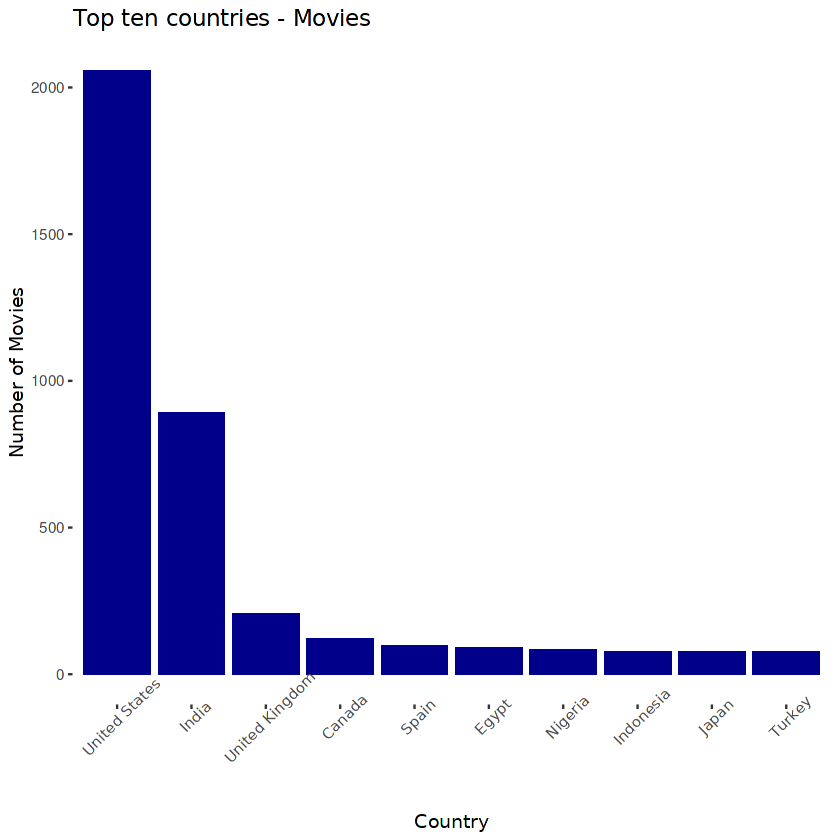

In [6]:

movies <- netflix_movies%>%
filter(type == "Movie")%>%
filter(country!="")%>%
group_by(country)%>%
summarize(number =n())%>%
arrange(desc(number))%>%
slice(1:10)

head(movies)

## Next, we will create a bar chart to visualize the above dataframe

ggplot(data = movies, aes(x = reorder(country,- number), y = number)) + geom_col(fill = "dark blue") + 
labs(title = 'Top ten countries - Movies') + 
xlab("Country")+
ylab("Number of Movies")+
theme(plot.title = element_text(40),axis.title.x = element_text(30)
      ,axis.title.y = element_text(30),panel.background = element_blank()
      ,axis.text.x = element_text(20, angle = 45))

Now, lets determine the top ten countries for TV shows

country,number
<chr>,<int>
United States,760
United Kingdom,213
Japan,169
South Korea,158
India,79
Taiwan,68


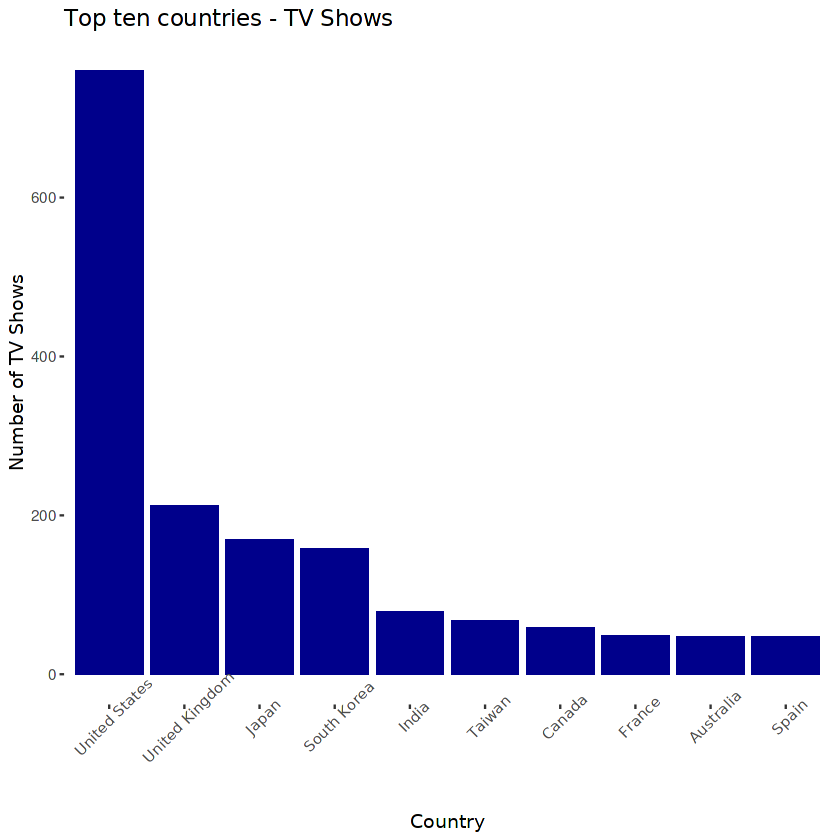

In [7]:
TVshows <- netflix_movies%>%
filter(type == "TV Show")%>%
filter(country!="")%>%
group_by(country)%>%
summarize(number = n())%>%
arrange(desc(number))%>%
slice(1:10)

head(TVshows)


ggplot(data = TVshows, aes(x = reorder(country,- number), y = number)) + geom_col(fill = "dark blue") + 
labs(title = 'Top ten countries - TV Shows') + 
xlab("Country")+
ylab("Number of TV Shows")+
theme(plot.title = element_text(40),axis.title.x = element_text(30)
      ,axis.title.y = element_text(30),panel.background = element_blank()
      ,axis.text.x = element_text(20, angle = 45))

****The United States is the country with the most movies and TV shows, according to the aforementioned investigations. 
However, the other top ten countries differ in content following the United States ****

**Next, we will determine who are the TOP DIRECTORS for netflx movies and TV shows**

As we did for movies and TVshows we will create a smaller dataframe for just directors.

director,number
<chr>,<int>
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13


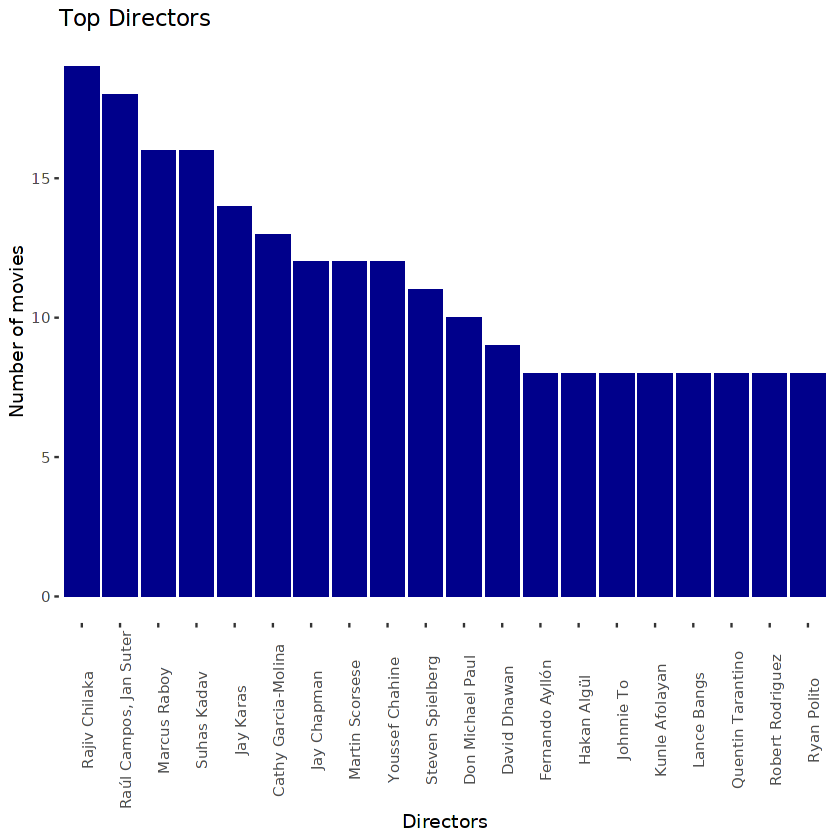

In [8]:
directors <- netflix_movies %>%
group_by(director)%>%
filter(director!="")%>%
summarize(number = n())%>%
arrange(desc(number))%>%
slice(1:20)

## In the code above we dropped all the missing values in director column.
head(directors)

ggplot(data=directors, aes(x=reorder(director, - number), y=number)) + 
       geom_col(fill='dark blue') + 
labs(title = "Top Directors") +
xlab("Directors")+
ylab("Number of movies")+
theme(panel.background= element_blank()
      ,plot.title=element_text(40)
      ,axis.title.x=element_text(30)
      ,axis.title.y=element_text(30)
      ,axis.text.x=element_text(20, angle = 90)
      ,axis.text.y=element_text(20))


***Let's determine which year(in recent years) had the most releases on Netflix ***

To avoid a cluster, we will work with years from 2010 to 2022

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<chr>,<chr>,<chr>,<chr>
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


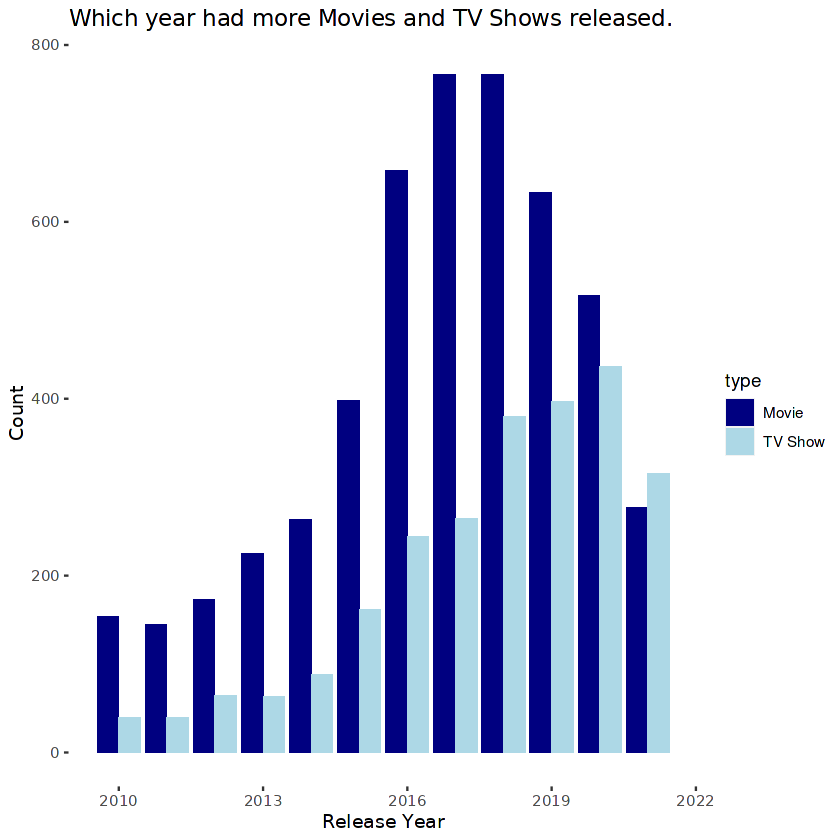

In [9]:
netflix_years <- netflix_movies%>%
filter(release_year>=2010)%>%
group_by(type)%>%
arrange()

head(netflix_years)

ggplot(data=netflix_years, aes(x=release_year,fill=type))+geom_bar(position=position_dodge()) +
labs(title = "Which year had more Movies and TV Shows released.") +
xlab("Release Year")+
ylab("Count")+
theme(panel.background = element_blank()
,plot.title=element_text(40)
,axis.title.x=element_text(30)
,axis.title.y=element_text(30)
,axis.text.x=element_text(20)
,axis.text.y=element_text(20))+
scale_fill_manual(breaks =c("Movie","TV Show"),
                 values=c("navy blue", "light blue"))



***The years with the most movie releases are 2017 and 2018, while 2020 has the most television show launches..***

*Additionally, we can observe a notable rise in the number of TV show releases over time.*

*(I'm still trying to figure out how to reorder a grouped bar chart)*

**Compare ratings of Movies and TVShows.**

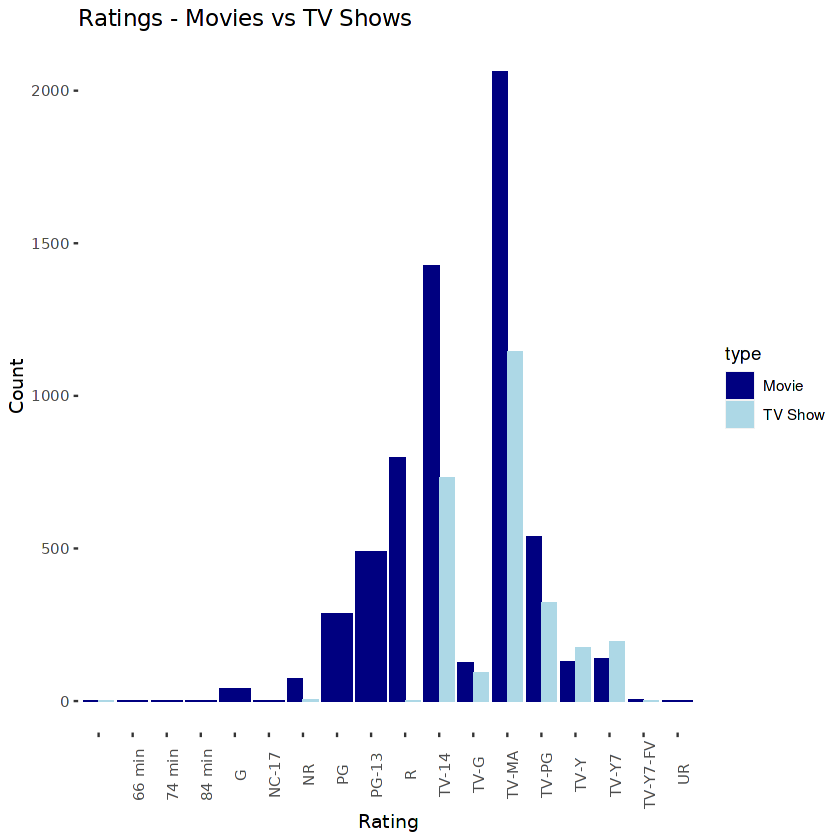

In [10]:
ggplot(data=netflix_movies,aes(x=rating, fill=type))+geom_bar(position=position_dodge())+
labs(title='Ratings - Movies vs TV Shows')+
xlab("Rating")+
ylab("Count")+
theme(panel.background = element_blank()
,plot.title=element_text(40)
,axis.title.x=element_text(30)
,axis.title.y=element_text(30)
,axis.text.x=element_text(20, angle = 90)
,axis.text.y=element_text(20))+
scale_fill_manual(breaks =c("Movie","TV Show"),
                 values=c("navy blue", "light blue"))



***We can tell from the plot above that the majority of Netflix movies and TV Shows are geared toward mature audiences, with movies and episodes not suitable for children under 14 coming in second.***

**Now we will try to determine whether the duration of movies and TV Shows have increased or reduced over the years**

`summarise()` has grouped output by 'release_year'. You can override using the
`.groups` argument.


release_year,duration
<int>,<chr>
1925,1 Season
1945,1 Season
1946,1 Season
1963,4 Seasons
1967,8 Seasons
1972,1 Season


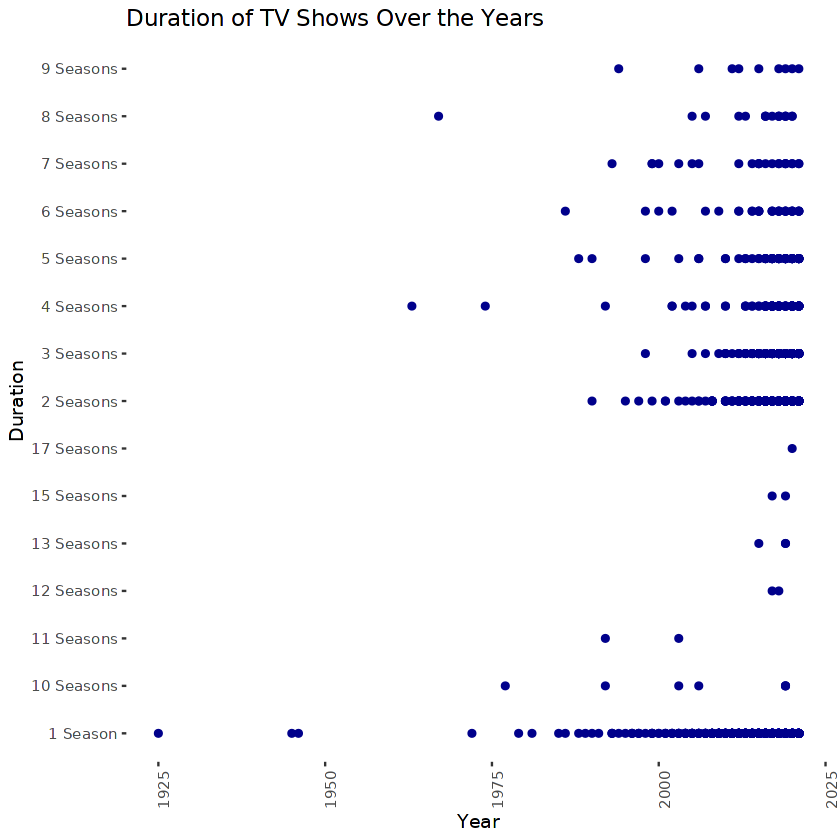

In [11]:
duration_movies<-netflix_movies%>%
filter(type=='TV Show')%>%
group_by(release_year)%>%
summarise(across(c(duration)))


head(duration_movies)


ggplot(duration_movies,aes(x=release_year, y = duration)) + geom_point(col = 'dark blue') +
labs(title = 'Duration of TV Shows Over the Years') +
xlab('Year')+
ylab('Duration')+
theme(panel.background =element_blank()
      ,plot.title = element_text(40)
      ,axis.text.x = element_text(20,angle=90)
      ,axis.text.y = element_text(20)
      ,axis.title.x = element_text(30)
      ,axis.title.y = element_text(30)) 


The aforementioned plot demonstrates how TV shows have been condensing to one season in recent years. 

For this to be more clear, I'll create another plot for years between 2010 and 2022.

`summarise()` has grouped output by 'release_year'. You can override using the
`.groups` argument.


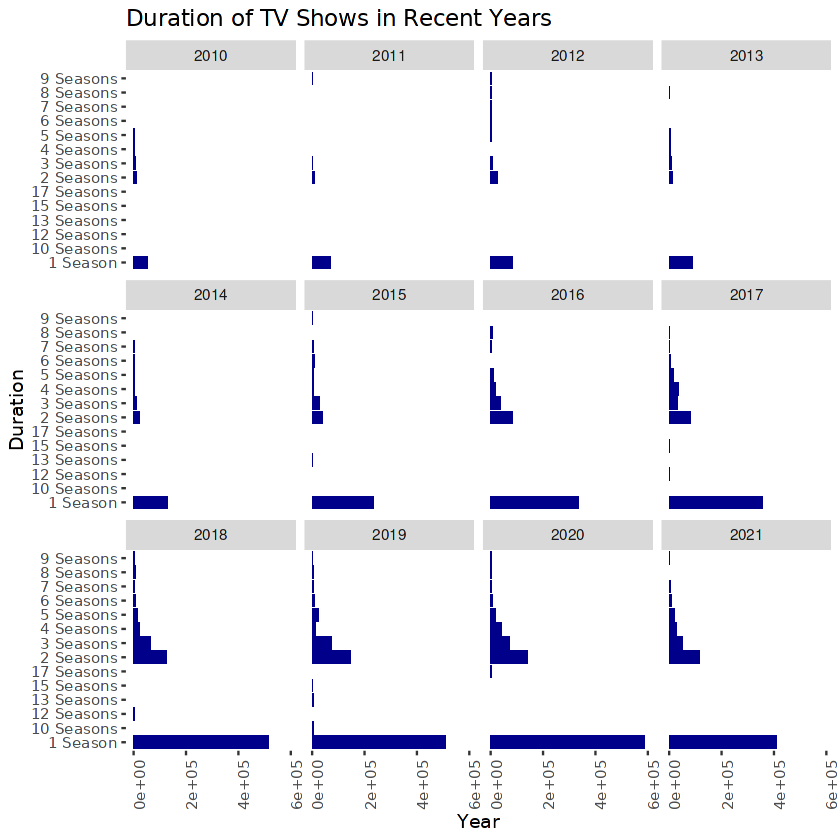

In [12]:
netflix_movies%>%
filter(release_year >= 2010)%>%
filter(type=='TV Show')%>%
group_by(release_year)%>%
summarise(across(c(duration)))%>%
ggplot(aes(x=release_year, y = duration)) +geom_col(fill = 'dark blue') +
labs(title = 'Duration of TV Shows in Recent Years') +
xlab('Year')+
ylab('Duration')+
theme(panel.background =element_blank()
      ,plot.title = element_text(40)
      ,axis.text.x = element_text(20,angle=90)
      ,axis.text.y = element_text(20)
      ,axis.title.x = element_text(30)
      ,axis.title.y = element_text(30)) + 
facet_wrap(~release_year)

The majority of TV Shows on Netflix have reduced to one season in recent years.

**Next, we will plot the duration of Movies**

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
2,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
4,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
5,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


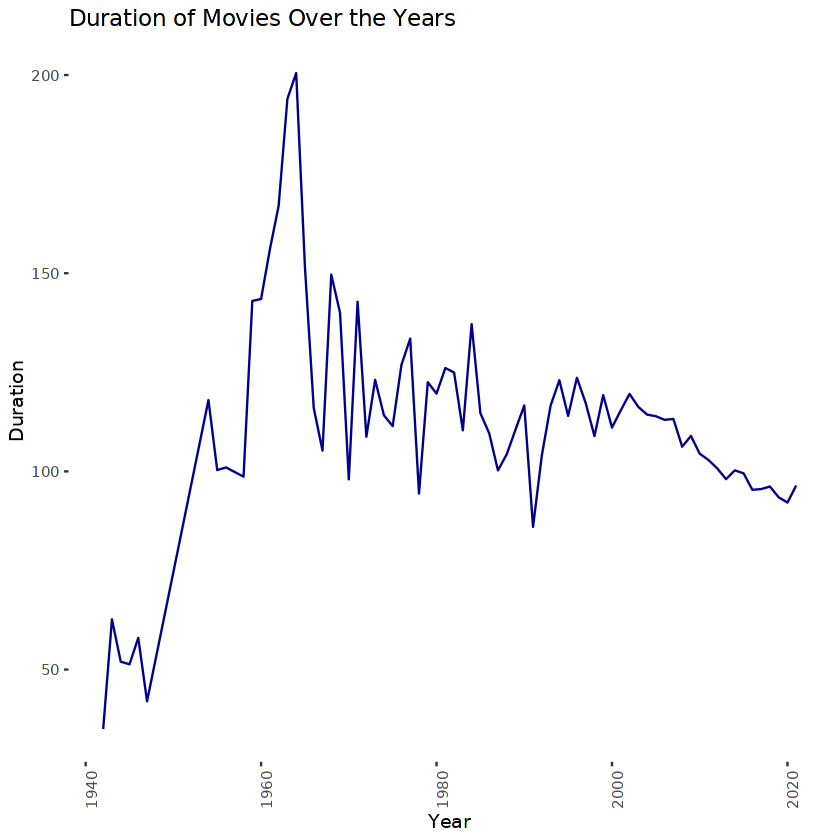

In [13]:
##I have to remove "min" under the duration column to find the average duration of movies per year
netflix_movies$duration<-gsub("min","",as.character(netflix_movies$duration))
## View dataset to make sure "min" hasbeen dropped  
head(netflix_movies)

##Now I can calculate average and plot 

netflix_movies%>%
filter(type == "Movie")%>%
filter(duration != "")%>%
group_by(release_year)%>%
summarize(avg_duration = mean(as.numeric(as.character(duration), na.rm = TRUE)))%>%
ggplot(aes(x=release_year, y = avg_duration)) +geom_line(col = 'dark blue') +
labs(title = 'Duration of Movies Over the Years') +
xlab('Year')+
ylab('Duration')+
theme(panel.background =element_blank()
      ,plot.title = element_text(40)
      ,axis.text.x = element_text(20,angle=90)
      ,axis.text.y = element_text(20)
      ,axis.title.x = element_text(30)
      ,axis.title.y = element_text(30)) 

***The plot above makes it quite evident that while Netflix movie lengths first climed, the duration  has considerably decreased over time.***

**Thank you.**